## Predictive Models in Linear and Logistic Regression

#### Task 1 (Points: 50):
Implement a linear regression model to predict the house price for the provided datasets. The
datasets (house_price_dataset.zip) has been uploaded to the CANVAS and Github links. The
datasets include the training, test sets, and data descriptions.
Steps need to be considered:
- Data encoding
- Data preprocessing
- Model implementation
- Evaluate the model with testing samples and
- Analysis of the results with Means Squared Error (MSE), absolute errors, and Root
MSE (RMSE).

In [1]:
# Imports i
import seaborn as sns; sns.set_theme(color_codes=True)
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import metrics

In [2]:
# Imports ii
import matplotlib.pyplot as plt
import sklearn.externals
import pandas as pd             
import numpy as np              
import graphviz
import warnings

In [3]:
# Imports iii
%matplotlib inline
warnings.filterwarnings('ignore')

In [4]:
#Our Data
test_dataset = pd.read_csv('Data/test.csv')
train_dataset = pd.read_csv('Data/train.csv')

In [5]:
print(test_dataset.shape)
test_dataset.head()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
print(train_dataset.shape)
train_dataset.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### EDA & Data preprocessing

In [7]:
print(test_dataset.info())
print(train_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
print(test_dataset.describe())
print(train_dataset.describe())

                Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000  ...   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704  ...   
std       1.113740    30.390071     21.130467   177.625900   455.268042  ...   
min 

#### Data Cleaning 

In [9]:
for col in train_dataset:
    train_dataset[col].replace(np.nan, 0, inplace=True)
    print(train_dataset[col].unique())

[   1    2    3 ... 1458 1459 1460]
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
['RL' 'RM' 'C (all)' 'FV' 'RH']
[ 65.  80.  68.  60.  84.  85.  75.   0.  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
[ 8450  9600 11250 ... 17217 13175  9717]
['Pave' 'Grvl']
[0 'Grvl' 'Pave']
['Reg' 'IR1' 'IR2' 'IR3']
['Lvl' 'Bnk' 'Low' 'HLS']
['AllPub' 'NoSeWa']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['Gtl' 'Mod' 'Sev']
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawy

#### Graphs & Data Visualization

Text(0.5, 1.0, 'Scatter plot of OpenPorchSF vs SalePrice')

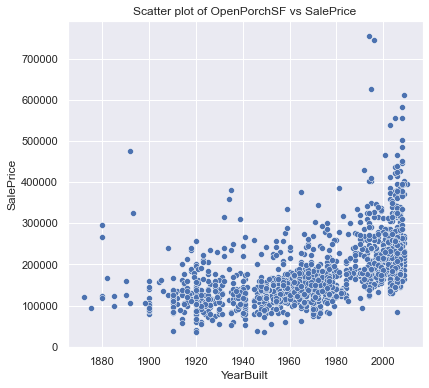

In [10]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='YearBuilt',y='SalePrice',data=train_dataset,palette='magma',ax=ax)
ax.set_title('Scatter plot of OpenPorchSF vs SalePrice')

Text(0.5, 1.0, 'Scatter plot of OverallCond vs SalePrice')

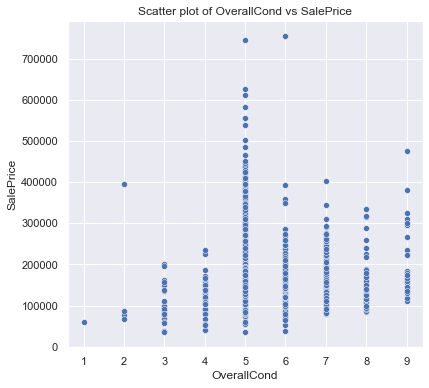

In [11]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='OverallCond',y='SalePrice',data=train_dataset,palette='magma',ax=ax)
ax.set_title('Scatter plot of OverallCond vs SalePrice')

Text(0.5, 1.0, 'Scatter plot of ScreenPorch vs SalePrice')

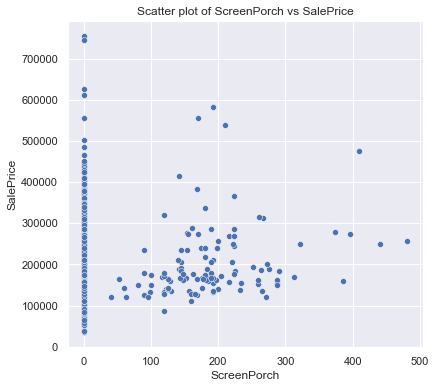

In [12]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='ScreenPorch',y='SalePrice',data=train_dataset,palette='magma',ax=ax)
ax.set_title('Scatter plot of ScreenPorch vs SalePrice')

#### Model Implementation and Prediction

In [13]:
X = train_dataset[['MasVnrArea', 'GarageArea', 'OverallCond', 'YearBuilt', 'MSSubClass', 'LotArea', 'OverallQual', 'YearRemodAdd']] # Data for training model
y = train_dataset['SalePrice'] # Data to be predicted

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [15]:
reg = LinearRegression()

In [16]:
reg.fit(X,y)

LinearRegression()

In [17]:
error_percentage = reg.score(X,y)
print(error_percentage)

0.722535253936011


In [18]:
reg.intercept_

-917995.034799693

In [19]:
pred = reg.predict(X_test)
print(pred)

[185727.83758776 168398.86753204 172466.34492621 165586.44626293
 121079.18415441 230268.93248648 100025.70699337 357712.54566531
 126750.917205   303052.55130511 198857.50757156 189668.94516982
 191412.63135562 168996.36935688 138024.82830041  59547.25654876
 167771.1813534  152945.17641423 137627.00251118  80763.56865396
 294932.99715124 132820.19187288 198849.7032217  215949.16076635
 127629.16396599  62305.67344225  82449.64550244 128010.65089425
 191397.9534768  147949.36064126 119055.60733569 290511.01172358
 104335.17034285 171083.69853451 201641.63619485 222442.32281253
 135928.79508347 224446.24549617 166672.69995935 148888.11404255
 208120.85835624  96933.27244044 239040.57264361 208141.26538635
 102238.14249936 195144.08444408 135587.42162611 137867.15792587
 220418.02477347 280836.265274    96841.66690819 216463.13716107
 205596.72112936 204631.02125524 231323.86621858 330640.97868382
 342891.49399361 101148.44460994 228108.82036145 159488.93036997
 132494.05796846 106160.3

In [20]:
# Save Prediction Results
res = pd.DataFrame(pred)
res.index = X_test.index 
res.columns = ["prediction"]
res.to_csv("Results.csv")

In [21]:
# calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(y_test, pred))
print(metrics.mean_squared_error(y_test, pred))
print(np.sqrt(metrics.mean_squared_error(y_test, pred)))

26818.905264607358
1466932569.5536146
38300.55573426598


In [22]:
# import ridge regression from sklearn library
# Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(X, y)
y_pred = ridgeR.predict(X_test)
 
# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)
 
# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= X_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

1466792112.6406925
        Columns  Coefficient Estimate
0    MasVnrArea             63.636912
1    GarageArea             67.520352
2   OverallCond           1272.410831
3     YearBuilt             67.428171
4    MSSubClass           -132.977619
5       LotArea              1.164449
6   OverallQual          31668.306442
7  YearRemodAdd            364.653677


In [23]:
# import Lasso regression from sklearn library
# Train the model
lasso = Lasso(alpha = 1)
lasso.fit(X, y)
y_pred1 = lasso.predict(X_test)
 
# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = X_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
 
print(lasso_coeff)

Mean squared error on test set 1466924991.4331794
        Columns  Coefficient Estimate
0    MasVnrArea             63.605750
1    GarageArea             67.478426
2   OverallCond           1270.961138
3     YearBuilt             67.180958
4    MSSubClass           -133.011928
5       LotArea              1.164341
6   OverallQual          31690.809837
7  YearRemodAdd            364.255038


In [24]:
# import model
# Train the model
e_net = ElasticNet(alpha = 1)
e_net.fit(X, y)
 
# calculate the prediction and mean square error
y_pred_elastic = e_net.predict(X_test)
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
print("Mean Squared Error on test set", mean_squared_error)
 
e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = X_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff

Mean Squared Error on test set 1513138233.155415


,Columns,Coefficient Estimate
0,MasVnrArea,79.013856
1,GarageArea,88.175225
2,OverallCond,1229.959400
3,YearBuilt,171.394075
4,MSSubClass,-116.972169
5,LotArea,1.217467
6,OverallQual,20568.839690
7,YearRemodAdd,578.490187
